In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd 
import warnings 
warnings.filterwarnings('ignore')

import random 
random.seed(42)

In [3]:
df = pd.read_csv('../data/crime_in_la.csv')

In [4]:
print([col for col in df.columns])

['DR_NO', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME', 'Rpt Dist No', 'Crm Cd', 'Crm Cd Desc', 'Mocodes', 'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Desc', 'Weapon Used Cd', 'Weapon Desc', 'Status', 'Status Desc', 'LOCATION', 'LAT', 'LON']


## Analyse des variables

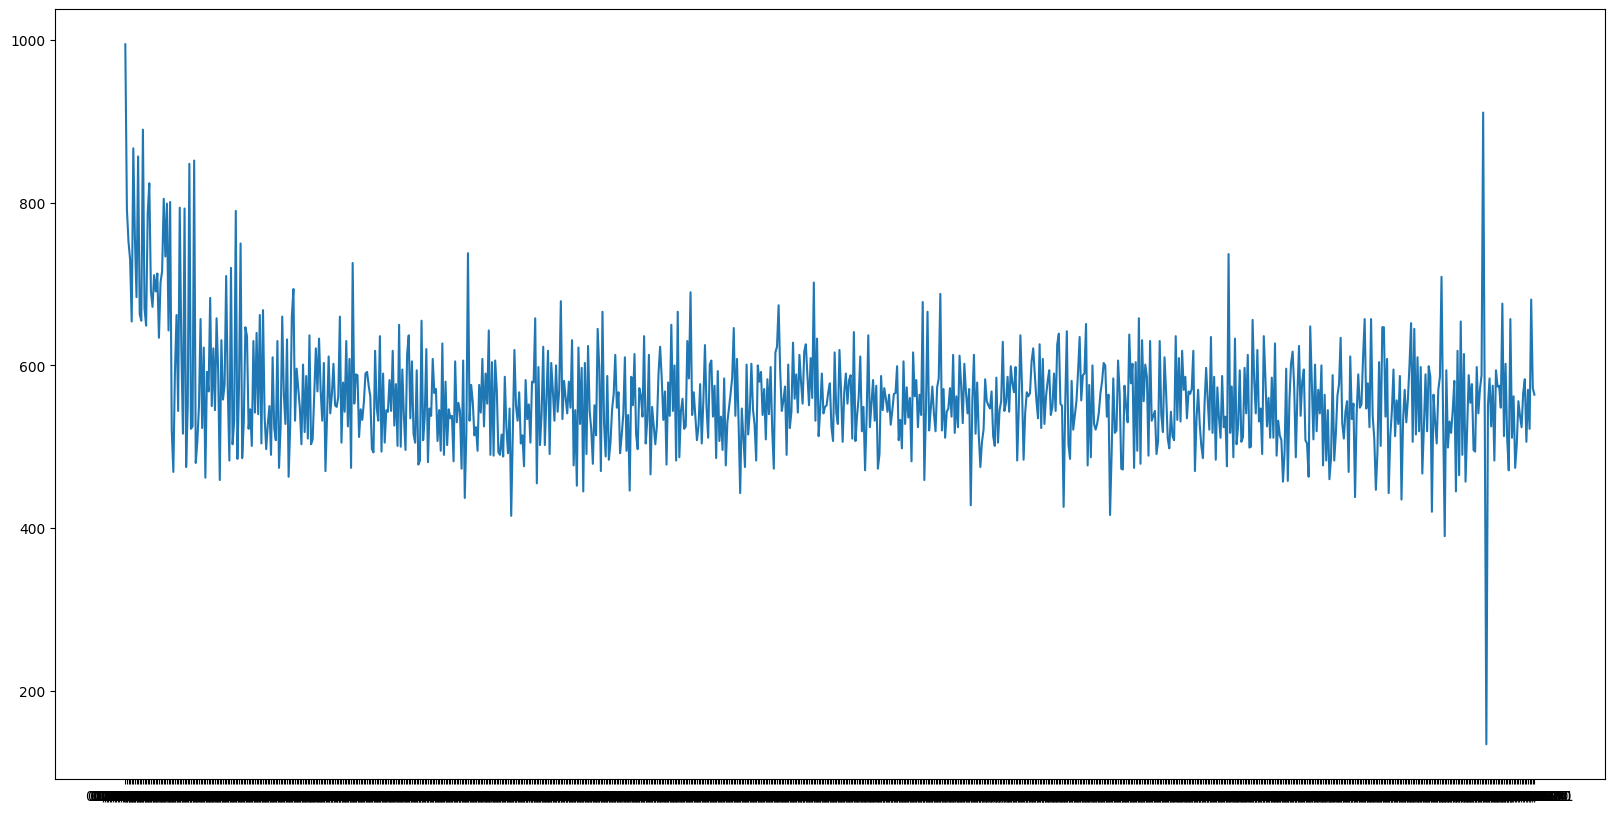

In [5]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20,10))
count = df['DATE OCC'].groupby(df['DATE OCC']).count()
plt.plot(count)
plt.show()

Ici, on observe que la répartition des crimes en fonctions de la date est plutôt stable.

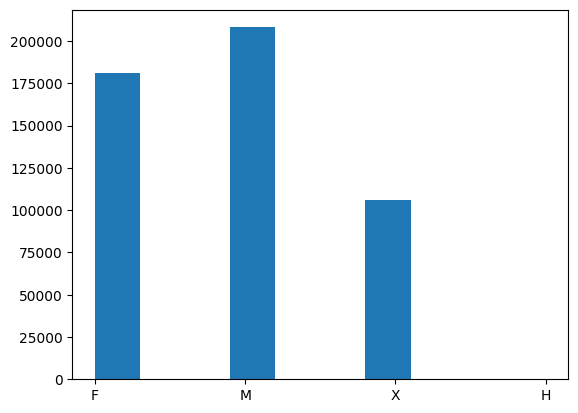

In [6]:
plt.hist(df['Vict Sex'])
plt.show()

Légère différence entre F/M et X => peut être supprimer les lignes X 

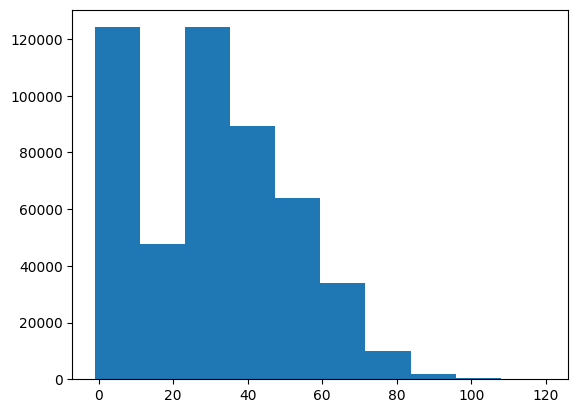

In [7]:
plt.hist(df['Vict Age'])
plt.show()

On observe que les ages sont distribué de manière normale. On considère que les ages égaux à 0 sont des anomalies et doivent être considéré comme Na. 

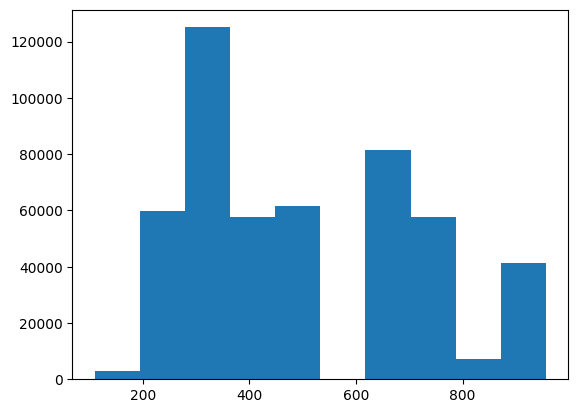

In [8]:
plt.hist(df['Crm Cd'])
plt.show()
#Vol de voiture le plus représenté

In [9]:
for col in df.columns:
    print(df[col].describe())
    print('\n -------------------------------- \n')

count    4.954100e+05
mean     2.091465e+08
std      7.395200e+06
min      8.170000e+02
25%      2.014097e+08
50%      2.106118e+08
75%      2.118202e+08
max      2.299104e+08
Name: DR_NO, dtype: float64

 -------------------------------- 

count         495410
unique           881
top       01/01/2020
freq             995
Name: DATE OCC, dtype: object

 -------------------------------- 

count     495410
unique      1439
top        12:00
freq       17944
Name: TIME OCC, dtype: object

 -------------------------------- 

count    495410.000000
mean         10.768563
std           6.068705
min           1.000000
25%           6.000000
50%          11.000000
75%          16.000000
max          21.000000
Name: AREA, dtype: float64

 -------------------------------- 

count          495410
unique             21
top       77th Street
freq            31537
Name: AREA NAME, dtype: object

 -------------------------------- 

count    495410.000000
mean       1123.137430
std         606.946832


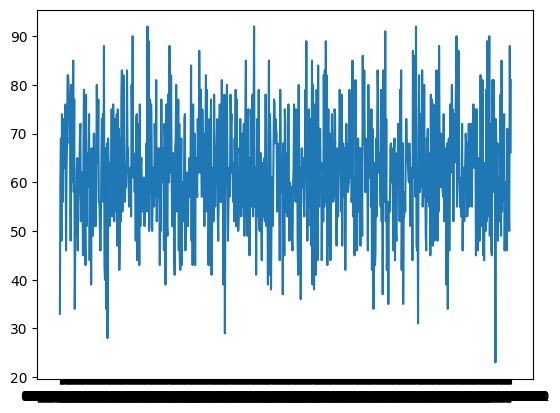

In [10]:
df['Crm Cd'] = df['Crm Cd'].astype(str)
plt.plot(df[df["Crm Cd"] == "510"].groupby(df['DATE OCC']).count()['DATE OCC'])
plt.show()

Ici, on observe que la répartition des vols de voiture en fonctions de la date est plutôt stable. 

In [11]:
crime_df = df[df["Crm Cd"] == "510"] # Réduction du dataset à la catégorie de crime "Vol de voiture"

In [12]:
# ! pip install folium
import folium 
m = folium.Map(
    location=[34.047598, -118.245564], 
    zoom_start=10,
    zoom_control=False,
    scrollWheelZoom=False,
    dragging=False
) # Création de la carte

In [13]:
all_long_lat = crime_df[['LAT','LON']].values.tolist()
all_long_lat = all_long_lat[:30]
for l_l in all_long_lat:
    folium.CircleMarker(l_l, radius=3,fill=True).add_to(m) # Ajout des points sur la carte

In [14]:
# from folium import plugins
# m = folium.Map(
#     location=[34.047598, -118.245564], 
#     zoom_start=10,
#     zoom_control=False,
#     scrollWheelZoom=False,
#     dragging=False
# )
# long_lat = crime_df[['LAT','LON']].values
# m.add_children(plugins.HeatMap(long_lat, radius=15))

In [15]:
# n = folium.Map(
#     location=[34.047598, -118.245564], 
#     zoom_start=10,
#     zoom_control=True,
#     scrollWheelZoom=False,
#     dragging=True
# )


# crime_df['LAT3'] = crime_df.LAT.apply(lambda x: round(x, 2))
# crime_df['LON3'] = crime_df.LON.apply(lambda x: round(x, 2))

# long_lat = crime_df[['LAT','LON']].values
# long_lat3 = crime_df[['LAT3','LON3']].values

# for l_l in long_lat:
#     folium.CircleMarker(location=l_l, radius=1, color='blue').add_to(n)

# for l_l in long_lat3:
#     folium.CircleMarker(location=l_l, radius=1, color='red').add_to(n)


La carte n'est pas display afin de ne pas encombrer le notebook et ne pas avoir a un fihchier trop lourd.

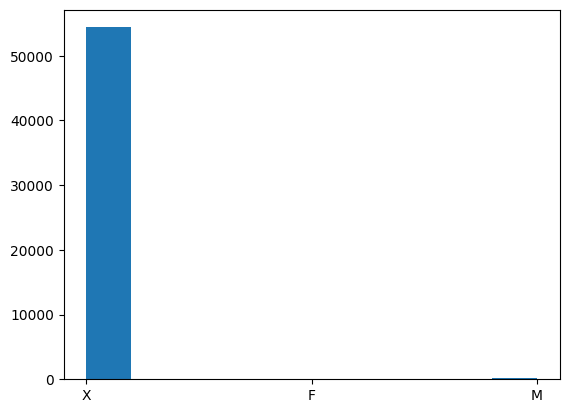

In [16]:
plt.hist(crime_df['Vict Sex'])
plt.show()

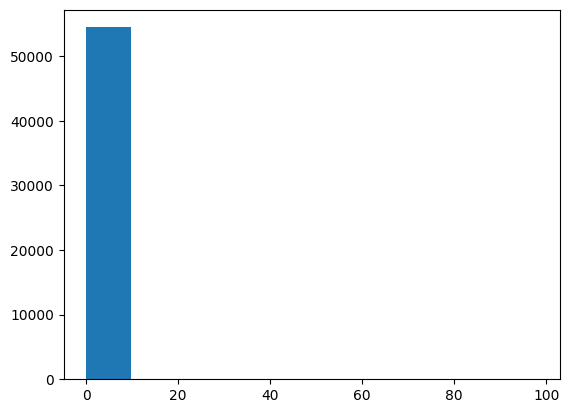

In [17]:
plt.hist(crime_df['Vict Age'])
plt.show()

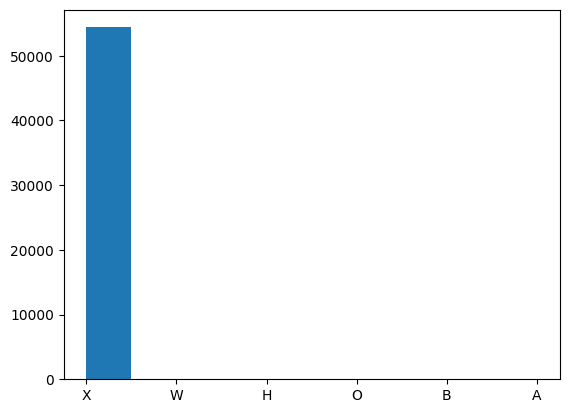

In [18]:
plt.hist(crime_df['Vict Descent'])
plt.show()

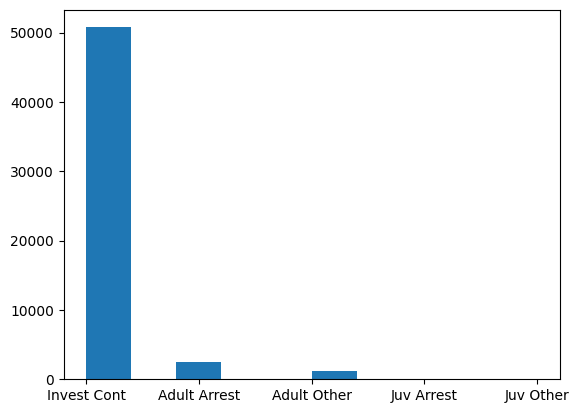

In [19]:
plt.hist(crime_df['Status Desc'])
plt.show()

STREET                                                             40988
PARKING LOT                                                         8133
DRIVEWAY                                                            2082
GARAGE/CARPORT                                                      1948
PARKING UNDERGROUND/BUILDING                                         494
ALLEY                                                                355
GAS STATION                                                           94
OTHER BUSINESS                                                        77
AUTO REPAIR SHOP                                                      66
YARD (RESIDENTIAL/BUSINESS)                                           58
AUTO SALES LOT                                                        50
HOTEL                                                                 47
SIDEWALK                                                              28
OTHER PREMISE                                      

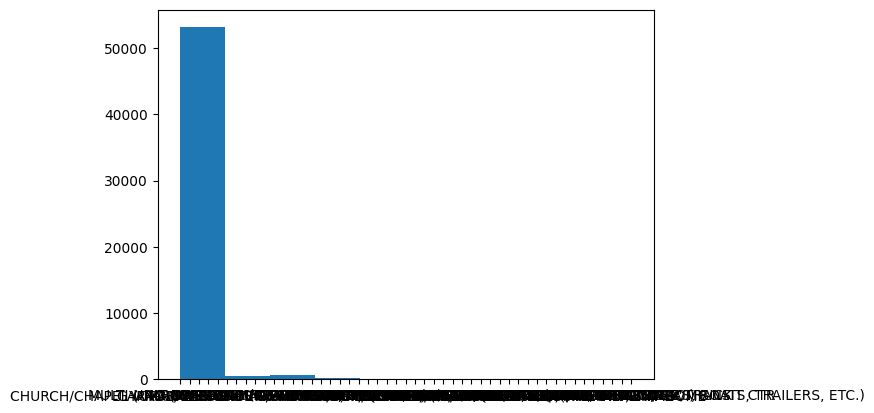

In [20]:
crime_df = crime_df[crime_df['Premis Desc'].notna()] # Suppression des lignes avec des valeurs manquantes
#print(set(crime_df['Premis Desc'].to_list()))
print(crime_df['Premis Desc'].value_counts())
plt.hist(crime_df['Premis Desc'])
plt.show()

In [21]:
print(set(crime_df['Premis Desc'].tolist())) # Liste des types de crimes associé aux vols de voiture 

{'HOTEL', 'LIQUOR STORE', 'HOSPITAL', 'AUTO DEALERSHIP (CHEVY, FORD, BMW, MERCEDES, ETC.)', 'SIDEWALK', 'OTHER PREMISE', 'OTHER BUSINESS', 'MTA - SILVER LINE - HARBOR GATEWAY TRANSIT CTR', 'TRAIN DEPOT/TERMINAL, OTHER THAN MTA', 'WAREHOUSE', 'MARKET', 'BUS DEPOT/TERMINAL, OTHER THAN MTA', 'DRUG STORE', 'PEDESTRIAN OVERCROSSING', "VEHICLE STORAGE LOT (CARS, TRUCKS, RV'S, BOATS, TRAILERS, ETC.)", 'PORCH, RESIDENTIAL', 'CHURCH/CHAPEL (CHANGED 03-03 FROM CHURCH/TEMPLE)', 'DEPT OF DEFENSE FACILITY', 'VEHICLE, PASSENGER/TRUCK', 'NURSING/CONVALESCENT/RETIREMENT HOME', 'PARKING UNDERGROUND/BUILDING', 'PARKING LOT', 'MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)', 'OTHER RESIDENCE', 'ALLEY', 'MANUFACTURING COMPANY', 'CONSTRUCTION SITE', 'GARAGE/CARPORT', 'PARK/PLAYGROUND', 'GAS STATION', 'OFFICE BUILDING/OFFICE', 'AUTO REPAIR SHOP', 'STREET', 'YARD (RESIDENTIAL/BUSINESS)', 'BOOK STORE', 'AUTO SALES LOT', 'SINGLE FAMILY DWELLING', 'ELEMENTARY SCHOOL', 'CAR WASH', 'TOW YARD*', 'FREEWAY', 'MINI-MAR

In [22]:
df_f = crime_df.copy()
df_f.head(10)

DR_NO    DATE OCC TIME OCC  AREA  AREA NAME  Rpt Dist No Crm Cd  \
21   200117988  03/09/2020    20:00     1    Central          111    510   
57   200104073  02/01/2020    03:45     1    Central          143    510   
101  200306227  06/02/2020    18:00     3  Southwest          397    510   
123  200104303  04/01/2020    16:30     1    Central          166    510   
150  200104381  06/01/2020    13:05     1    Central          159    510   
157  200105200  17/01/2020    23:00     1    Central          185    510   
161  200104411  06/01/2020    23:00     1    Central          182    510   
199  200104513  07/01/2020    20:00     1    Central          101    510   
204  200104610  08/01/2020    17:30     1    Central          101    510   
217  200104577  08/01/2020    19:00     1    Central          192    510   

          Crm Cd Desc Mocodes  Vict Age Vict Sex Vict Descent     Premis Desc  \
21   VEHICLE - STOLEN       0         0        X            X  GARAGE/CARPORT   
57   VEHICLE - STOLEN       0         0        X            X     PARKING LOT   
101  VEHICLE - STOLEN       0         0        X            X          STREET   
123  VEHICLE - STOLEN       0         0        X            X     PARKING LOT   
150  VEHICLE - STOLEN       0         0        X            X     PARKING LOT   
157  VEHICLE - STOLEN       0         0        X            X          STREET   
161  VEHICLE - STOLEN       0         0        X            X          STREET   
199  VEHICLE - STOLEN       0         0        X            X          STREET   
204  VEHICLE - STOLEN       0         0        X            X  GARAGE/CARPORT   
217  VEHICLE - STOLEN       0         0        X            X          STREET   

     Weapon Used Cd                  Weapon Desc Status  Status Desc  \
21            500.0  UNKNOWN WEAPON/OTHER WEAPON     IC  Invest Cont   
57            500.0  UNKNOWN WEAPON/OTHER WEAPON     IC  Invest Cont   
101           500.0  UNKNOWN WEAPON/OTHER WEAPON     IC  Invest Cont   
123           500.0  UNKNOWN WEAPON/OTHER WEAPON     IC  Invest Cont   
150           500.0  UNKNOWN WEAPON/OTHER WEAPON     IC  Invest Cont   
157           500.0  UNKNOWN WEAPON/OTHER WEAPON     IC  Invest Cont   
161           500.0  UNKNOWN WEAPON/OTHER WEAPON     IC  Invest Cont   
199           500.0  UNKNOWN WEAPON/OTHER WEAPON     IC  Invest Cont   
204           500.0  UNKNOWN WEAPON/OTHER WEAPON     IC  Invest Cont   
217           500.0  UNKNOWN WEAPON/OTHER WEAPON     IC  Invest Cont   

                                    LOCATION      LAT       LON  
21    500 N  FIGUEROA                     ST  34.0615 -118.2470  
57    400 S  SPRING                       ST  34.0488 -118.2500  
101          43RD                         ST  34.0073 -118.2980  
123   600    WALL                         ST  34.0435 -118.2471  
150  2000 E  7TH                          ST  34.0387 -118.2335  
157                         1000 S  BROADWAY  34.0409 -118.2574  
161  1000 S  GRAND                        AV  34.0430 -118.2606  
199          ALPINE                       ST  34.0652 -118.2468  
204  1100 W  SUNSET                       BL  34.0685 -118.2460  
217                                   VENICE  34.0372 -118.2694

In [23]:
df_f = df_f[(df_f['Premis Desc'] == "STREET") | (df_f['Premis Desc'] == "PARKING LOT") | (df_f['Premis Desc'] == "DRIVEWAY")] # Réduction du dataset aux types de crimes les plus représentés

df_f = df_f[(df_f['LAT']!=0) & (df_f['LON']!=0)] # Suppression des lignes avec des valeurs manquantes
df_f['date'] = pd.to_datetime(df_f['DATE OCC'], format='%d/%m/%Y') # Conversion de la colonne date en datetime
df_f.set_index('date', inplace=True) 

In [24]:
df_f.shape

(51142, 20)

In [25]:
df_f.head(10)

DR_NO    DATE OCC TIME OCC  AREA  AREA NAME  Rpt Dist No  \
date                                                                       
2020-01-02  200104073  02/01/2020    03:45     1    Central          143   
2020-02-06  200306227  06/02/2020    18:00     3  Southwest          397   
2020-01-04  200104303  04/01/2020    16:30     1    Central          166   
2020-01-06  200104381  06/01/2020    13:05     1    Central          159   
2020-01-17  200105200  17/01/2020    23:00     1    Central          185   
2020-01-06  200104411  06/01/2020    23:00     1    Central          182   
2020-01-07  200104513  07/01/2020    20:00     1    Central          101   
2020-01-08  200104577  08/01/2020    19:00     1    Central          192   
2020-01-10  200104715  10/01/2020    10:45     1    Central          159   
2020-01-10  200104721  10/01/2020    07:00     1    Central          158   

           Crm Cd       Crm Cd Desc Mocodes  Vict Age Vict Sex Vict Descent  \
date                                                                          
2020-01-02    510  VEHICLE - STOLEN       0         0        X            X   
2020-02-06    510  VEHICLE - STOLEN       0         0        X            X   
2020-01-04    510  VEHICLE - STOLEN       0         0        X            X   
2020-01-06    510  VEHICLE - STOLEN       0         0        X            X   
2020-01-17    510  VEHICLE - STOLEN       0         0        X            X   
2020-01-06    510  VEHICLE - STOLEN       0         0        X            X   
2020-01-07    510  VEHICLE - STOLEN       0         0        X            X   
2020-01-08    510  VEHICLE - STOLEN       0         0        X            X   
2020-01-10    510  VEHICLE - STOLEN       0         0        X            X   
2020-01-10    510  VEHICLE - STOLEN       0         0        X            X   

            Premis Desc  Weapon Used Cd                  Weapon Desc Status  \
date                                                                          
2020-01-02  PARKING LOT           500.0  UNKNOWN WEAPON/OTHER WEAPON     IC   
2020-02-06       STREET           500.0  UNKNOWN WEAPON/OTHER WEAPON     IC   
2020-01-04  PARKING LOT           500.0  UNKNOWN WEAPON/OTHER WEAPON     IC   
2020-01-06  PARKING LOT           500.0  UNKNOWN WEAPON/OTHER WEAPON     IC   
2020-01-17       STREET           500.0  UNKNOWN WEAPON/OTHER WEAPON     IC   
2020-01-06       STREET           500.0  UNKNOWN WEAPON/OTHER WEAPON     IC   
2020-01-07       STREET           500.0  UNKNOWN WEAPON/OTHER WEAPON     IC   
2020-01-08       STREET           500.0  UNKNOWN WEAPON/OTHER WEAPON     IC   
2020-01-10       STREET           500.0  UNKNOWN WEAPON/OTHER WEAPON     IC   
2020-01-10       STREET           500.0  UNKNOWN WEAPON/OTHER WEAPON     IC   

            Status Desc                                 LOCATION      LAT  \
date                                                                        
2020-01-02  Invest Cont   400 S  SPRING                       ST  34.0488   
2020-02-06  Invest Cont          43RD                         ST  34.0073   
2020-01-04  Invest Cont   600    WALL                         ST  34.0435   
2020-01-06  Invest Cont  2000 E  7TH                          ST  34.0387   
2020-01-17  Invest Cont                         1000 S  BROADWAY  34.0409   
2020-01-06  Invest Cont  1000 S  GRAND                        AV  34.0430   
2020-01-07  Invest Cont          ALPINE                       ST  34.0652   
2020-01-08  Invest Cont                                   VENICE  34.0372   
2020-01-10  Invest Cont          FACTORY                      PL  34.0391   
2020-01-10  Invest Cont   600    CERES                        AV  34.0398   

                 LON  
date                  
2020-01-02 -118.2500  
2020-02-06 -118.2980  
2020-01-04 -118.2471  
2020-01-06 -118.2335  
2020-01-17 -118.2574  
2020-01-06 -118.2606  
2020-01-07 -118.2468  
2020-01-08 -118.2694  
2020-01-10 -118.2384  
2020-01-10 -118.2413

## Modèle 

### XGBoost sans datetime

In [26]:
# !pip install graphviz
import xgboost as xgb
from xgboost import plot_importance, plot_tree

In [27]:
# Train begin on the 01/01/2022
date = '01-01-2022'

train = df_f[df_f.index < date].copy() # Train set
test = df_f[df_f.index >= date].copy() # Test set

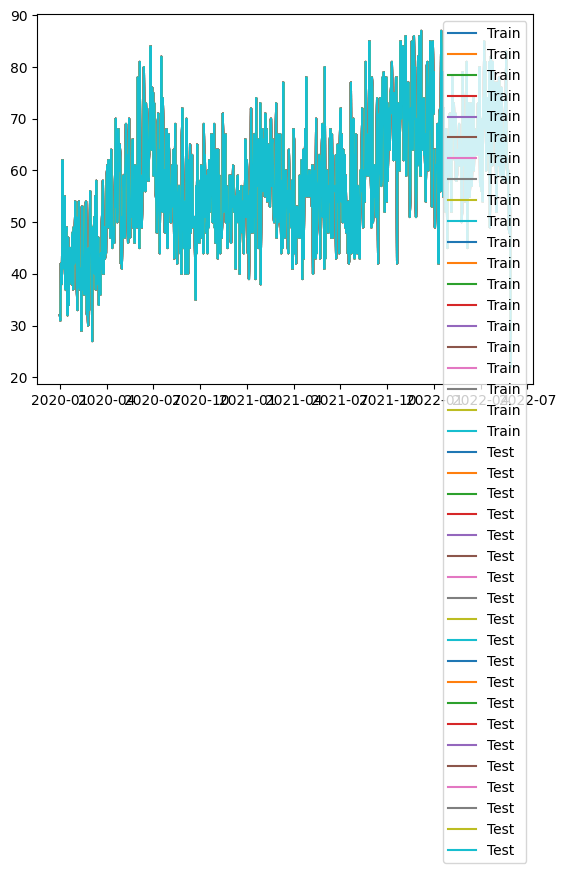

In [28]:
countTrain = train.groupby(train.index).count()
countTest = test.groupby(test.index).count()
plt.plot(countTrain, label="Train")
plt.plot(countTest, label="Test")
plt.legend()
plt.show()

In [29]:
def get_data(df, labels= None): 
    """
    Fonction permettant de créer les features à partir de la date

    Parameters
    ----------
    df : DataFrame
        DataFrame contenant les données
    labels : DataFrame, optional
        Noms des labels dans le dataframe
    
    Returns
    -------
    X : DataFrame
        DataFrame contenant les features
    y : DataFrame, optional
        DataFrame contenant les labels
    """
    df['date'] = df.index
    df['dayofweek'] = df['date'].dt.dayofweek
    df['quarter'] = df['date'].dt.quarter
    df['month'] = df['date'].dt.month
    df['year'] = df['date'].dt.year
    df['dayofyear'] = df['date'].dt.dayofyear
    df['dayofmonth'] = df['date'].dt.day
    df['weekofyear'] = df['date'].dt.weekofyear
    

    X = df[['dayofweek','quarter','month','year', 'dayofyear','dayofmonth','weekofyear']]
    if labels:
        y = df[labels]
        return X, y
    return X

In [30]:
X_train, y_train = get_data(train, labels=['LAT', 'LON'])
X_test, y_test = get_data(test, labels=['LAT', 'LON'])

#### XGBoost sur train

In [33]:
import numpy as np
model = xgb.XGBRegressor(
    n_estimators=1000, learning_rate=0.05, n_jobs=4, 
    objective='reg:squarederror', random_state=42, 
    ) # Création du modèle XGBoost regressor
model.fit(
    X_train, 
    y_train, 
    early_stopping_rounds=5, 
    eval_set=[(X_test, y_test)], 
    verbose=True, 
    eval_metric='mae', 
    # sample_weight=np.sqrt(y_train['LAT']**2 + y_train['LON']**2), 
    # sample_weight_eval_set=[np.sqrt(y_train['LAT']**2 + y_train['LON']**2), np.sqrt(y_test['LAT']**2 + y_test['LON']**2)], 
) # Entrainement du modèle

[0]	validation_0-mae:72.39563
[1]	validation_0-mae:68.77597
[2]	validation_0-mae:65.33728
[3]	validation_0-mae:62.07053
[4]	validation_0-mae:58.96711
[5]	validation_0-mae:56.01886
[6]	validation_0-mae:53.21801
[7]	validation_0-mae:50.55720
[8]	validation_0-mae:48.02944
[9]	validation_0-mae:45.62805
[10]	validation_0-mae:43.34674
[11]	validation_0-mae:41.17948
[12]	validation_0-mae:39.12059
[13]	validation_0-mae:37.16464
[14]	validation_0-mae:35.30648
[15]	validation_0-mae:33.54123
[16]	validation_0-mae:31.86424
[17]	validation_0-mae:30.27110
[18]	validation_0-mae:28.75761
[19]	validation_0-mae:27.31979
[20]	validation_0-mae:25.95387
[21]	validation_0-mae:24.65624
[22]	validation_0-mae:23.42348
[23]	validation_0-mae:22.25237
[24]	validation_0-mae:21.13981
[25]	validation_0-mae:20.08287
[26]	validation_0-mae:19.07878
[27]	validation_0-mae:18.12490
[28]	validation_0-mae:17.21870
[29]	validation_0-mae:16.35782
[30]	validation_0-mae:15.53998
[31]	validation_0-mae:14.76303
[32]	validation_0-

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=4, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [34]:
model.predict(X_train)

array([[  34.03314 , -118.30262 ],
       [  34.05987 , -118.30352 ],
       [  34.07913 , -118.297966],
       ...,
       [  34.05719 , -118.305855],
       [  34.052395, -118.30407 ],
       [  34.05909 , -118.3099  ]], dtype=float32)

In [35]:
pred = model.predict(X_train)
# lat = [int(coord[0])/10000+33 for coord in pred]
# lon = [int(coord[1])/10000-118 for coord in pred]
# train['LAT'] = train.LAT.apply(lambda x: x/10000+33)
# train['LON'] = train.LON.apply(lambda x: x/10000-118)
lat = [round(coord[0], 4) for coord in pred]
lon = [round(coord[1], 4) for coord in pred]
train['LAT_pred'] = lat
train['LON_pred'] = lon
train.LAT_pred = train.LAT_pred.apply(lambda x: round(x, 4))
train.LON_pred = train.LON_pred.apply(lambda x: round(x, 4))
train.head(10)

DR_NO    DATE OCC TIME OCC  AREA  AREA NAME  Rpt Dist No  \
date                                                                       
2020-01-02  200104073  02/01/2020    03:45     1    Central          143   
2020-02-06  200306227  06/02/2020    18:00     3  Southwest          397   
2020-01-04  200104303  04/01/2020    16:30     1    Central          166   
2020-01-06  200104381  06/01/2020    13:05     1    Central          159   
2020-01-17  200105200  17/01/2020    23:00     1    Central          185   
2020-01-06  200104411  06/01/2020    23:00     1    Central          182   
2020-01-07  200104513  07/01/2020    20:00     1    Central          101   
2020-01-08  200104577  08/01/2020    19:00     1    Central          192   
2020-01-10  200104715  10/01/2020    10:45     1    Central          159   
2020-01-10  200104721  10/01/2020    07:00     1    Central          158   

           Crm Cd       Crm Cd Desc Mocodes  Vict Age  ...       date  \
date                                                   ...              
2020-01-02    510  VEHICLE - STOLEN       0         0  ... 2020-01-02   
2020-02-06    510  VEHICLE - STOLEN       0         0  ... 2020-02-06   
2020-01-04    510  VEHICLE - STOLEN       0         0  ... 2020-01-04   
2020-01-06    510  VEHICLE - STOLEN       0         0  ... 2020-01-06   
2020-01-17    510  VEHICLE - STOLEN       0         0  ... 2020-01-17   
2020-01-06    510  VEHICLE - STOLEN       0         0  ... 2020-01-06   
2020-01-07    510  VEHICLE - STOLEN       0         0  ... 2020-01-07   
2020-01-08    510  VEHICLE - STOLEN       0         0  ... 2020-01-08   
2020-01-10    510  VEHICLE - STOLEN       0         0  ... 2020-01-10   
2020-01-10    510  VEHICLE - STOLEN       0         0  ... 2020-01-10   

           dayofweek quarter  month  year dayofyear dayofmonth weekofyear  \
date                                                                        
2020-01-02         3       1      1  2020         2          2          1   
2020-02-06         3       1      2  2020        37          6          6   
2020-01-04         5       1      1  2020         4          4          1   
2020-01-06         0       1      1  2020         6          6          2   
2020-01-17         4       1      1  2020        17         17          3   
2020-01-06         0       1      1  2020         6          6          2   
2020-01-07         1       1      1  2020         7          7          2   
2020-01-08         2       1      1  2020         8          8          2   
2020-01-10         4       1      1  2020        10         10          2   
2020-01-10         4       1      1  2020        10         10          2   

            LAT_pred  LON_pred  
date                            
2020-01-02   34.0331 -118.3026  
2020-02-06   34.0599 -118.3035  
2020-01-04   34.0791 -118.2980  
2020-01-06   34.0757 -118.3102  
2020-01-17   34.0588 -118.3057  
2020-01-06   34.0757 -118.3102  
2020-01-07   34.0831 -118.3113  
2020-01-08   34.0379 -118.2951  
2020-01-10   34.0834 -118.3058  
2020-01-10   34.0834 -118.3058  

[10 rows x 30 columns]

<AxesSubplot: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

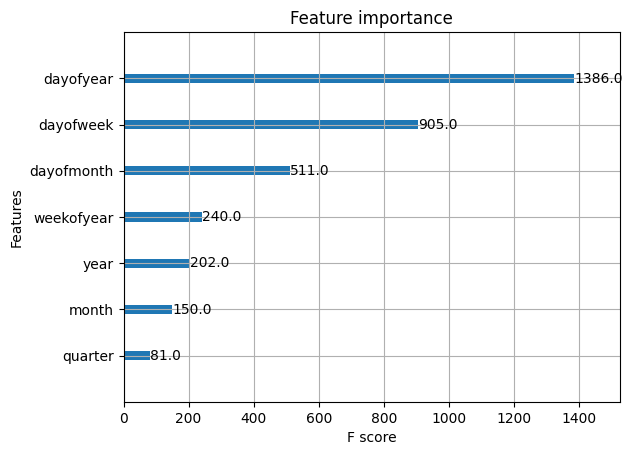

In [36]:
plot_importance(model) # Affichage de l'importance des features

On observe que les features ayant le plus d'importance sont le jours de l'année, le jours de la semaine et le jours du mois. 

In [37]:
n = folium.Map(
    location=[34.047598, -118.245564], 
    zoom_start=10,
    zoom_control=True,
    scrollWheelZoom=False,
    dragging=True
) # Création de la carte

testview = train.sample(1000) # Sélection d'un échantillon de 1000 lignes
long_lat = testview[['LAT','LON']].values
long_lat_pred = testview[['LAT_pred','LON_pred']].values
# colors = ['red', 'blue', 'green', 'purple', 'orange'] # Couleurs pour les marqueurs

# i = 0
for l_l in long_lat:
    folium.CircleMarker(location=l_l, radius=2, color='blue').add_to(n) # Ajout des marqueurs réels sur la carte
#     i += 1
# i=0
for l_l in long_lat_pred:
    folium.CircleMarker(location=l_l, radius=2, color="red").add_to(n) # Ajout des marqueurs prédits sur la carte
    # i+=1
n

#### XGBoost avec sur test

In [39]:
pred = model.predict(X_test)
lat = [round(coord[0], 4) for coord in pred]
lon = [round(coord[1], 4) for coord in pred]
test['LAT_pred'] = lat
test['LON_pred'] = lon
test.LAT_pred = test.LAT_pred.apply(lambda x: round(x, 4))
test.LON_pred = test.LON_pred.apply(lambda x: round(x, 4))

In [40]:
test.head()


DR_NO    DATE OCC TIME OCC  AREA    AREA NAME  Rpt Dist No  \
date                                                                         
2022-04-22  221809626  22/04/2022    21:00    18    Southeast         1862   
2022-05-09  220111997  09/05/2022    11:30     1      Central          152   
2022-02-23  221306839  23/02/2022    22:00    13       Newton         1385   
2022-01-20  221205057  20/01/2022    19:00    12  77th Street         1218   
2022-05-25  221212540  25/05/2022    17:00    12  77th Street         1213   

           Crm Cd       Crm Cd Desc Mocodes  Vict Age  ...       date  \
date                                                   ...              
2022-04-22    510  VEHICLE - STOLEN       0         0  ... 2022-04-22   
2022-05-09    510  VEHICLE - STOLEN       0         0  ... 2022-05-09   
2022-02-23    510  VEHICLE - STOLEN       0         0  ... 2022-02-23   
2022-01-20    510  VEHICLE - STOLEN       0         0  ... 2022-01-20   
2022-05-25    510  VEHICLE - STOLEN       0         0  ... 2022-05-25   

           dayofweek quarter  month  year dayofyear dayofmonth weekofyear  \
date                                                                        
2022-04-22         4       2      4  2022       112         22         16   
2022-05-09         0       2      5  2022       129          9         19   
2022-02-23         2       1      2  2022        54         23          8   
2022-01-20         3       1      1  2022        20         20          3   
2022-05-25         2       2      5  2022       145         25         21   

            LAT_pred  LON_pred  
date                            
2022-04-22   34.0536 -118.3046  
2022-05-09   34.0546 -118.3072  
2022-02-23   34.0573 -118.3010  
2022-01-20   34.0636 -118.3069  
2022-05-25   34.0542 -118.3022  

[5 rows x 30 columns]

In [41]:
n = folium.Map(
    location=[34.047598, -118.245564], 
    zoom_start=10,
    zoom_control=True,
    scrollWheelZoom=False,
    dragging=True
)

testview = test.sample(500, random_state=42)
long_lat = testview[['LAT','LON']].values
long_lat_pred = testview[['LAT_pred','LON_pred']].values
for l_l in long_lat:
    folium.CircleMarker(location=l_l, radius=2, color='blue').add_to(n)

for l_l in long_lat_pred:
    folium.CircleMarker(location=l_l, radius=2, color='red').add_to(n)
n

In [43]:
# test.to_csv('../data/res/test1.csv')
# train.to_csv('../data/res/train1.csv')

In [47]:
from sklearn.ensemble import RandomForestRegressor

model_rd_forest = RandomForestRegressor(n_estimators=1000, n_jobs=4, random_state=42, )
model_rd_forest.fit(
    X_train,
    y_train,
)

pred = model_rd_forest.predict(X_test)
lat = [round(coord[0], 4) for coord in pred]
lon = [round(coord[1], 4) for coord in pred]
error = np.sqrt((test['LAT'] - lat)**2 + (test['LON'] - lon)**2)
print(f"MAE: {np.mean(error)}")

# test.head()

test['LAT_pred'] = lat
test['LON_pred'] = lon
test.LAT_pred = test.LAT_pred.apply(lambda x: round(x, 4))
test.LON_pred = test.LON_pred.apply(lambda x: round(x, 4))

n = folium.Map(
    location=[34.047598, -118.245564], 
    zoom_start=10,
    zoom_control=True,
    scrollWheelZoom=False,
    dragging=True
)

testview = test.sample(1000, random_state=42)
long_lat = testview[['LAT','LON']].values
long_lat_pred = testview[['LAT_pred','LON_pred']].values
for l_l in long_lat:
    folium.CircleMarker(location=l_l, radius=2, color='red').add_to(n)

for l_l in long_lat_pred:
    folium.CircleMarker(location=l_l, radius=2, color='blue').add_to(n)
n

MAE: 0.13414087862681193


In [45]:
from sklearn.neighbors import KNeighborsRegressor

model_knn = KNeighborsRegressor(
    n_neighbors=2, 
    n_jobs=None, 
    weights='distance', 
    algorithm='kd_tree', # or ball_tree
    # leaf_size=10, 
    p=1, 
    metric='minkowski', 
    metric_params=None, 
)

model_knn.fit(
    X_train,
    y_train,
)

pred = model_knn.predict(X_test)
lat = [round(coord[0], 4) for coord in pred]
lon = [round(coord[1], 4) for coord in pred]
error = np.sqrt((test['LAT'] - lat)**2 + (test['LON'] - lon)**2)
# print(f"MAE: {np.mean(error)}")

test['LAT_pred'] = lat
test['LON_pred'] = lon
test.LAT_pred = test.LAT_pred.apply(lambda x: round(x, 4))
test.LON_pred = test.LON_pred.apply(lambda x: round(x, 4))

n = folium.Map(
    location=[34.047598, -118.245564], 
    zoom_start=10,
    zoom_control=True,
    scrollWheelZoom=False,
    dragging=True
)

testview = test.sample(1000, random_state=42)
long_lat = testview[['LAT','LON']].values
long_lat_pred = testview[['LAT_pred','LON_pred']].values
for l_l in long_lat:
    folium.CircleMarker(location=l_l, radius=2, color='red').add_to(n)

for l_l in long_lat_pred:
    folium.CircleMarker(location=l_l, radius=2, color='blue').add_to(n)
n

In [46]:
model_knn = KNeighborsRegressor(
    n_neighbors=2, 
    n_jobs=None, 
    weights='distance', 
    algorithm='kd_tree', # or ball_tree
    # leaf_size=10, 
    p=2, 
    metric='minkowski', 
    metric_params=None, 
) # Création du modèle

model_knn.fit(
    X_train,
    y_train,
) # Entrainement du modèle

pred = model_knn.predict(X_train)
lat = [round(coord[0], 4) for coord in pred]
lon = [round(coord[1], 4) for coord in pred]
error = np.sqrt((train['LAT'] - lat)**2 + (train['LON'] - lon)**2) # Calcul de l'erreur en utilisant la distrance euclidienne
# print(f"MAE: {np.mean(error)}")

train['LAT_pred'] = lat
train['LON_pred'] = lon
train.LAT_pred = train.LAT_pred.apply(lambda x: round(x, 4))
train.LON_pred = train.LON_pred.apply(lambda x: round(x, 4))

n = folium.Map(
    location=[34.047598, -118.245564], 
    zoom_start=10,
    zoom_control=True,
    scrollWheelZoom=False,
    dragging=True
)

testview = train.sample(1000, random_state=42) # On prend 1000 points aléatoires
long_lat = testview[['LAT','LON']].values
long_lat_pred = testview[['LAT_pred','LON_pred']].values
for l_l in long_lat:
    folium.CircleMarker(location=l_l, radius=2, color='red').add_to(n) # On ajoute les points réels

for l_l in long_lat_pred:
    folium.CircleMarker(location=l_l, radius=2, color='blue').add_to(n) # On ajoute les points prédits
n